In [4]:
import pandas as pd
import random
from torchvision.transforms import ToPILImage, Resize, ToTensor
from torchvision.utils import make_grid
from torch import Tensor
from PIL import Image, ImageDraw
from glob import glob
from tqdm import tqdm

METADATA_PATH = './'
IMAGES_PATH = './images/'

dfdb_meta = pd.read_parquet(f'{METADATA_PATH}/metadata.parquet')

files = glob(f'{IMAGES_PATH}/*')
files.sort()

indexes = list(range(len(files)))

def create_grid(n_rows=10, img_size=256, rand=True, prompt_cap=40):
    BLACK = (0,0,0)
    n_files = n_rows**2
    idxs = indexes.copy()
    if rand:
        random.shuffle(idxs)
        idxs = idxs[:n_files]
    else: 
        idxs = idxs[:n_files]
    images = []
    prompts = []
    for i in idxs:
        img = Image.open(files[i])
        img = Resize((img_size, img_size))(img)
        d1 = ImageDraw.Draw(img)
        try:
            prompt = [p for p in dfdb_meta[dfdb_meta['image_name']==files[i]
                                          .split('/')[-1]]['prompt']][0]
            d1.text((0,0), prompt[:prompt_cap], BLACK)
        # TODO: fix UTF encoding issue
        except: 
            print(f'Exception!\t{prompt}')
        img = ToTensor()(img)
        images.append(img)
        prompts.append(prompt)
    grid = ToPILImage()\
           (make_grid(images, nrow=n_rows))
    return idxs, prompts, grid

Full prompts:
000 -> hearthstone card art of mark zuckerberg as a gadgetzan auctioneer, illustrated by konstantin turovec, zoltan boros, alex horley orlandelli, matt dixon, trending on artstation, masterpiece digital art, concept art, composition by greg rutkowski 
001 -> centric diatoms 
002 -> hairless Badger
003 -> A beautiful award winning painting of a tropical beach with individual palm trees and blue ocean trending on artstation vibrant color scheme lots detail
004 -> mary louise brooks is half robot, robotic, chrome skin, 1 9 8 0 s airbrush, clean lines, futuristic, blade runner, geometric lighting patterns, bright back light glow 
005 -> full-body neon porcelain baroque bladerunner greek style sculpture of a young royal Ozuna as a high-fashion half-robot wearing retro shades with a porcelain body with an opening exposing a battery leaking green glowing radioactive liquid, electric sparks, glowing violet laser beam eyes, crown of giant rubies,  flowing pink and orange neon-colo

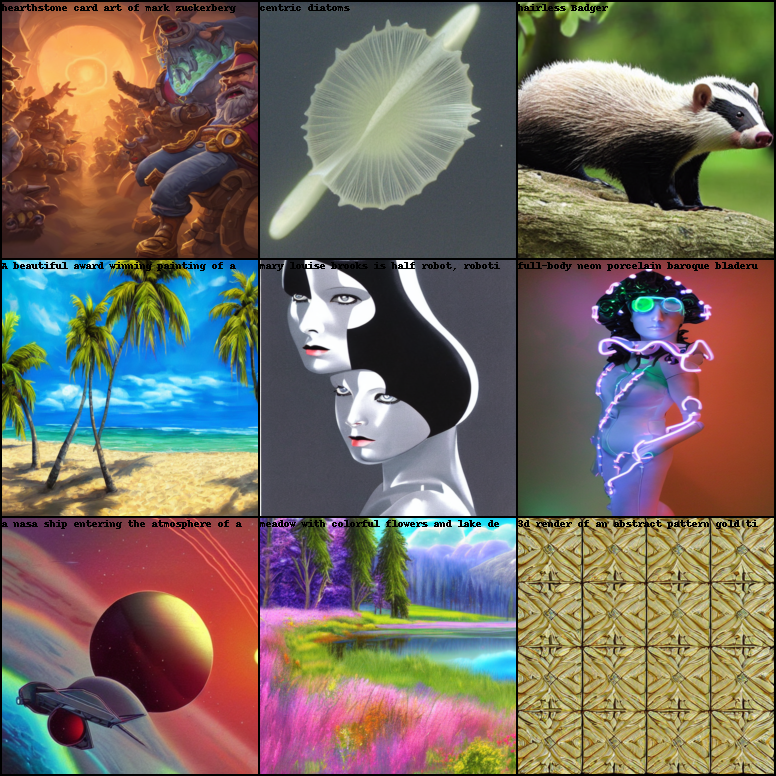

In [5]:
FULL_PROMPTS = True #set to False if you don't want read the entire prompts
idxs, prompts, grid = create_grid(n_rows=3)
if FULL_PROMPTS:
    c = 0
    print('Full prompts:')
    for p in prompts:
        print(f'{c:03d} -> {p}')
        c += 1
grid